In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_json("../thai_sentiment_dataset.json")
df = df.drop_duplicates()
bk_sentiment = df.sentiment
df

,story,sentiment
0,นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวง...,positive
1,"สวยงามยิ่งนัก กับเพชรเม็ดงามที่หายากยิ่ง ""บลูไ...",positive
2,"โดยระหว่างวันดัชนีทำจุดสูงสุดที่ 1,417.16 จุด ...",positive
3,## ประเทศไทยนำเข้าปุ๋ยปีละกว่าแสนล้านบาท ซึ่งห...,positive
4,"""เจเอเอส แอสเซ็ท (J)"" โชว์กำไร Q3/66 ทะยาน 617...",positive
...,...,...
26995,แชร์ :\n\n \n \n \n \n\n\nคุณวิภาวรรณ มหาด...,neutral
26996,นายธนวัฒน์ กิตติสุวรรณ ผู้ช่วยผู้จัดการใหญ่ ผู...,neutral
26997,Advertisement\n\n \n\n\nมติ 'ก้าวไกล' ขับ 'ไช...,neutral
26998,วันที่ 7 พฤศจิกายน 2566 เวลา 09.00 น. นายไพโร...,neutral


In [3]:
df["story"][0]

'นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวงคมนาคม เปิดเผยถึงการเตรียมความพร้อมรองรับผู้โดยสารชาวอินเดียและไต้หวันตามนโยบายฟรีวีซ่าของรัฐบาล โดยระบุว่า ตามที่คณะรัฐมนตรี (ครม.) มีมติอนุมัติในหลักการฟรีวีซ่าให้กับนักท่องเที่ยวชาวอินเดียและไต้หวันให้อยู่ในราชอาณาจักรไทยได้ไม่เกิน 30 วัน ตั้งแต่วันที่ 10 พ.ย. 2566 - 10 พ.ค.2567 (ระยะเวลา 6 เดือน) ซึ่งจะสร้างแรงจูงใจให้กับนักท่องเที่ยวเดินทางเข้ามาเที่ยวประเทศไทย และขับเคลื่อนระบบเศรษฐกิจในภาพรวมของประเทศในช่วงปี 2566-2567ในส่วนของกระทรวงคมนาคมได้บูรณาการความร่วมมือในการเตรียมการรองรับนักท่องเที่ยวให้ดีที่สุด ตั้งแต่เดินทางเข้าสู่ประเทศตลอดจนถึงการเดินทางกลับออกจากประเทศไทย โดยได้สั่งการให้บริษัท ท่าอากาศยานไทย จำกัด (มหาชน) หรือ ทอท. เตรียมความพร้อมในด้านต่างๆ รวมถึงหาแนวทางการดำเนินการ เพื่ออำนวยความสะดวกรองรับการเดินทางของผู้โดยสาร ณ ท่าอากาศยานสุวรรณภูมิ ดอนเมือง และอื่นๆ พร้อมทั้งให้ประสานงานกับตำรวจตรวจคนเข้าเมือง (ตม.) เพื่อให้กระบวนการทุกขั้นตอนมีความสะดวกรวดเร็ว ไม่ให้ผู้โดยสารเกิดความแออัด หรือใช้เวลานานหลังจากลงจากเครื่องบินข

In [4]:
df['sentiment'].value_counts()

sentiment
negative    8714
positive    8647
neutral     8640
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

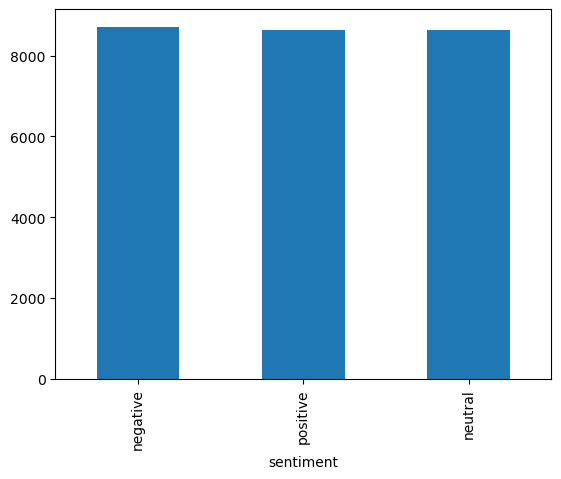

In [5]:
df['sentiment'].value_counts().plot.bar()

In [6]:
import re
def remove_text_in_parentheses(text):
    return re.sub(r'\([^)]*\)', '', text)

df['story_clean'] = df['story'].apply(remove_text_in_parentheses)

In [7]:
df["story_clean"][0]

'นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวงคมนาคม เปิดเผยถึงการเตรียมความพร้อมรองรับผู้โดยสารชาวอินเดียและไต้หวันตามนโยบายฟรีวีซ่าของรัฐบาล โดยระบุว่า ตามที่คณะรัฐมนตรี  มีมติอนุมัติในหลักการฟรีวีซ่าให้กับนักท่องเที่ยวชาวอินเดียและไต้หวันให้อยู่ในราชอาณาจักรไทยได้ไม่เกิน 30 วัน ตั้งแต่วันที่ 10 พ.ย. 2566 - 10 พ.ค.2567  ซึ่งจะสร้างแรงจูงใจให้กับนักท่องเที่ยวเดินทางเข้ามาเที่ยวประเทศไทย และขับเคลื่อนระบบเศรษฐกิจในภาพรวมของประเทศในช่วงปี 2566-2567ในส่วนของกระทรวงคมนาคมได้บูรณาการความร่วมมือในการเตรียมการรองรับนักท่องเที่ยวให้ดีที่สุด ตั้งแต่เดินทางเข้าสู่ประเทศตลอดจนถึงการเดินทางกลับออกจากประเทศไทย โดยได้สั่งการให้บริษัท ท่าอากาศยานไทย จำกัด  หรือ ทอท. เตรียมความพร้อมในด้านต่างๆ รวมถึงหาแนวทางการดำเนินการ เพื่ออำนวยความสะดวกรองรับการเดินทางของผู้โดยสาร ณ ท่าอากาศยานสุวรรณภูมิ ดอนเมือง และอื่นๆ พร้อมทั้งให้ประสานงานกับตำรวจตรวจคนเข้าเมือง  เพื่อให้กระบวนการทุกขั้นตอนมีความสะดวกรวดเร็ว ไม่ให้ผู้โดยสารเกิดความแออัด หรือใช้เวลานานหลังจากลงจากเครื่องบินขณะเดียวกัน ให้จัดตั้งศูนย์บัญชาการร่

In [22]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ทุกอัน',
 'น้อยๆ',
 'ยกให้',
 'เป็นดัง',
 'ครั้ง',
 'เมื่อคืน',
 'ด้วยเหตุนี้',
 'นอกจากที่',
 'เท่านี้',
 'ไป่',
 'เมื่อคราวก่อน',
 'จ้ะ',
 'สูงสุด',
 'ทุกคราว',
 'สมัยโน้น',
 'อย่างดี',
 'เมื่อวาน',
 'ยก',
 'ดั่งกับ',
 'อย่างนี้',
 'ข้างเคียง',
 'ทุกที',
 'กล่าวคือ',
 'เช่นดังก่อน',
 'เสมือนกับ',
 'แค่ไหน',
 'ถึงแม้จะ',
 'ออก',
 'กว้างขวาง',
 'ขณะที่',
 'แค่ว่า',
 'ภายหน้า',
 'หน่อย',
 'ยิ่ง',
 'ยังงี้',
 'ค่อยไปทาง',
 'ภายนอก',
 'ฉะนั้น',
 'กำหนด',
 'จ๊ะ',
 'เท่านั้น',
 'ช่วงต่อไป',
 'เหตุไร',
 'ภาค',
 'ไกลๆ',
 'ยิ่งขึ้นไป',
 'บางที',
 'เพื่อให้',
 'ถึงเมื่อไร',
 'คะ',
 'เสียยิ่งนัก',
 'ทีใด',
 'สั้น',
 'ครั้งที่',
 'เพียงแต่',
 'ขณะเดียวกัน',
 'เอา',
 'ภายใน',
 'แต่ทว่า',
 'ได้แต่',
 'คราวใด',
 'เสียก่อน',
 'ตามแต่',
 'เป็นเพื่อ',
 'เห็นแก่',
 'อันจะ',
 'พวกท่าน',
 'พอที',
 'ยืนยาว',
 'ปฏิบัติ',
 'ใหม่',
 'บางๆ',
 'ด้วยกัน',
 'เธอ',
 'ทุกวันนี้',
 'เป็นต้น',
 'แค่นั้น',
 'อันที่',
 'เป็นการ',
 'นอกนั้น',
 'เปลี่ยนแปลง',
 'จวบกับ',
 'แต่ก่อน',
 'เหตุนั้น',
 'หากแม้',
 'สิ่งไหน',
 

In [23]:
from pythainlp import word_tokenize

def text_process(text):
    # Remove characters in the list
    final = "".join(u for u in text if u not in ("ๆ", "ฯ", "๑", "๒", "๓", "๔", "๕", "๖", "๗" , "๘", "๙", "๐"))
    # Remove patterns matching regular expression
    final = re.sub(r'[a-zA-Z0-9]', '', final)
    final = re.sub(r'["\n)(":/-=.?]', '', final)
    final = re.sub(r"[' - # ,@%]", '', final)
    # Tokenize words
    final = word_tokenize(final)
    # Remove stopwords
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)
    return final

df['story_clean'] = df['story_clean'].apply(text_process)
df

,story,sentiment,story_clean
0,นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวง...,positive,นาย สุริยะ จึง รุ่งเรือง กิจ รัฐมนตรี ว่าการ ก...
1,"สวยงามยิ่งนัก กับเพชรเม็ดงามที่หายากยิ่ง ""บลูไ...",positive,สวยงาม ยิ่งนัก กับ เพชร เม็ด งาม ที่ หา ยาก ยิ...
2,"โดยระหว่างวันดัชนีทำจุดสูงสุดที่ 1,417.16 จุด ...",positive,โดย ระหว่าง วัน ดัชนี ทำ จุดสูงสุด ที่ จุด และ...
3,## ประเทศไทยนำเข้าปุ๋ยปีละกว่าแสนล้านบาท ซึ่งห...,positive,ประเทศ ไทย นำเข้า ปุ๋ย ปี ละ กว่า แสน ล้าน บาท...
4,"""เจเอเอส แอสเซ็ท (J)"" โชว์กำไร Q3/66 ทะยาน 617...",positive,เจ เอ เอส แอ ส เซ็ท โชว์ กำไร ทะยาน จาก โครง ก...
...,...,...,...
26995,แชร์ :\n\n \n \n \n \n\n\nคุณวิภาวรรณ มหาด...,neutral,แชร์ คุณ วิภา วรรณ มหา ดำ รงค์ กุล กรรมการผู้จ...
26996,นายธนวัฒน์ กิตติสุวรรณ ผู้ช่วยผู้จัดการใหญ่ ผู...,neutral,นาย ธน วัฒน์ กิตติ สุวรรณ ผู้ช่วย ผู้จัดการ ให...
26997,Advertisement\n\n \n\n\nมติ 'ก้าวไกล' ขับ 'ไช...,neutral,มติ ก้าวไกล ขับ ไช ยาม พ วาน พ้น พรรค หลัง ไม่...
26998,วันที่ 7 พฤศจิกายน 2566 เวลา 09.00 น. นายไพโร...,neutral,วันที่ พฤศจิกายน เวลา น นาย ไพโรจน์ โชติก เสถี...


In [28]:
df['story'][269]

'ไทยถกเกาหลี ‘เพิ่มสิทธิการบิน’ แก้ปมมาตรฐานปลอดภัยปี 67\n\n  \n\n\nนายสุทธิพงษ์ คงพูล ผู้อำนวยการสำนักงานการบินพลเรือนแห่งประเทศไทย (กพท.) เปิดเผยถึงความคืบหน้าแก้ไขปัญหาข้อบกพร่องด้านการบินตามมาตรฐานองค์การบริหารการบินแห่งสหรัฐอเมริกา (FAA) โดยระบุว่า ขณะนี้ กพท.อยู่ระหว่างแก้ไขปัญหาด้านการบินตามข้อแนะนำของ FAA ซึ่งมีความคืบหน้าอย่างต่อเนื่อง ประเด็นสำคัญที่ยังอยู่ระหว่างเร่งแก้ไขเหลือเพียง 2 เรื่อง คือ\n\n  \n\n\n1\\\\. จำนวนผู้ตรวจสอบด้านการบิน (Inspector) ยังไม่เพียงพอ โดยเฉพาะผู้ตรวจสอบความสมควรเดินอากาศ (Airworthiness Inspector) ผู้ตรวจสอบหน่วยซ่อม (Repair Station Inspector) และผู้ตรวจสอบวิศวกรรมอากาศยาน (Aircraft Engineering Inspector) ยังขาดอยู่ประมาณ 10 คน จากทั้งหมด 50 คน\n\n  \n\n\nและ 2.การออกใบรับรองให้ศูนย์ซ่อมอากาศยานในต่างประเทศ ที่สายการบินสัญชาติไทยนำเครื่องบินไปซ่อม ประมาณ 200 กว่าแห่งทั่วโลก ซึ่ง กพท. ต้องส่งเจ้าหน้าที่ไปตรวจศูนย์ซ่อมเหล่านี้ ขณะนี้สามารถออกไปรับรองให้ศูนย์ซ่อมฯ ได้กว่า 100 แห่ง\n\n  \n\n\nอย่างไรก็ดี เนื่องจากขณะนี้การแก้ไขข้อบกพร่องตามมาตรฐาน FAA

In [29]:
df['story_clean'][269]

'ไทย ถก เกาหลี ‘ เพิ่ม สิทธิ การ บิน ’ แก้ ปม มาตรฐาน ปลอดภัย ปี นาย สุทธิ พงษ์ คง พูล ผู้อำนวยการ สำนัก งานการ บิน พลเรือน แห่ง ประเทศ ไทย เปิดเผย ถึง ความคืบหน้า แก้ไขปัญหา ข้อบกพร่อง ด้าน การ บิน ตาม มาตรฐาน องค์ การบริหาร การ บิน แห่ง สหรัฐอเมริกา โดย ระบุ ว่า ขณะนี้ กพท อยู่ ระหว่าง แก้ไขปัญหา ด้าน การ บิน ตาม ข้อแนะนำ ของ ซึ่ง มี ความคืบหน้า อย่าง ต่อเนื่อง ประเด็นสำคัญ ที่ ยังอยู่ ระหว่าง เร่ง แก้ไข เหลือ เพียง เรื่อง คือ \\\\ จำนวน ผู้ตรวจสอบ ด้าน การ บิน ยัง ไม่ เพียงพอ โดยเฉพาะ ผู้ตรวจสอบ ความ สมควร เดินอากาศ ผู้ตรวจสอบ หน่วย ซ่อม และ ผู้ตรวจสอบ วิศวกรรม อากาศยาน ยัง ขาด อยู่ ประมาณ คน จาก ทั้งหมด คน และ การ ออก ใบรับรอง ให้ ศูนย์ ซ่อม อากาศยาน ใน ต่างประเทศ ที่ สายการบิน สัญชาติ ไทย นำ เครื่องบิน ไป ซ่อม ประมาณ กว่า แห่ง ทั่วโลก ซึ่ง กพท ต้อง ส่ง เจ้าหน้าที่ ไป ตรวจ ศูนย์ ซ่อม เหล่านี้ ขณะนี้ สามารถ ออก ไป รับรอง ให้ ศูนย์ ซ่อม ได้ กว่า แห่ง อย่างไรก็ดี เนื่องจาก ขณะนี้ การ แก้ไข ข้อบกพร่อง ตาม มาตรฐาน ใกล้ แล้วเสร็จ โดย ประเด็น ที่ มี สาระสำคัญ ด้าน ความปลอดภัย ดำเนินการ แก

In [30]:
list = []
for each in df["sentiment"]:
    if each == "negative":
        list.append(-1)
    elif each == "positive":
        list.append(1)
    else:
        list.append(0)
# nb.sentiment = [-1 if each == "negative" else if each == "positive" else 1 for each in nb.sentimen ]
df["sentiment"] = list
df

,story,sentiment,story_clean
0,นายสุริยะจึงรุ่งเรืองกิจ รัฐมนตรีว่าการกระทรวง...,1,นาย สุริยะ จึง รุ่งเรือง กิจ รัฐมนตรี ว่าการ ก...
1,"สวยงามยิ่งนัก กับเพชรเม็ดงามที่หายากยิ่ง ""บลูไ...",1,สวยงาม ยิ่งนัก กับ เพชร เม็ด งาม ที่ หา ยาก ยิ...
2,"โดยระหว่างวันดัชนีทำจุดสูงสุดที่ 1,417.16 จุด ...",1,โดย ระหว่าง วัน ดัชนี ทำ จุดสูงสุด ที่ จุด และ...
3,## ประเทศไทยนำเข้าปุ๋ยปีละกว่าแสนล้านบาท ซึ่งห...,1,ประเทศ ไทย นำเข้า ปุ๋ย ปี ละ กว่า แสน ล้าน บาท...
4,"""เจเอเอส แอสเซ็ท (J)"" โชว์กำไร Q3/66 ทะยาน 617...",1,เจ เอ เอส แอ ส เซ็ท โชว์ กำไร ทะยาน จาก โครง ก...
...,...,...,...
26995,แชร์ :\n\n \n \n \n \n\n\nคุณวิภาวรรณ มหาด...,0,แชร์ คุณ วิภา วรรณ มหา ดำ รงค์ กุล กรรมการผู้จ...
26996,นายธนวัฒน์ กิตติสุวรรณ ผู้ช่วยผู้จัดการใหญ่ ผู...,0,นาย ธน วัฒน์ กิตติ สุวรรณ ผู้ช่วย ผู้จัดการ ให...
26997,Advertisement\n\n \n\n\nมติ 'ก้าวไกล' ขับ 'ไช...,0,มติ ก้าวไกล ขับ ไช ยาม พ วาน พ้น พรรค หลัง ไม่...
26998,วันที่ 7 พฤศจิกายน 2566 เวลา 09.00 น. นายไพโร...,0,วันที่ พฤศจิกายน เวลา น นาย ไพโรจน์ โชติก เสถี...
